# Rule Based

In [1]:
grammar=  """
sentence=adj noun verb adv noun2  
adj= adj_single adj_single 的|null
adj_single= 漂亮|蓝色|好看
adv= 安静地|静静
noun= 猫|女人|男人
verb= adv 看着| adv 坐着 
noun2=桌子|皮球 
"""

In [2]:
import random
def build_grammar(grammar_str):
    grammar_pattern={}
    for line in grammar.split('\n'):
        if not line: continue
        stmt,expr=line.split('=')
        grammar_pattern[stmt]=[e.split() for e in expr.split('|')]
    return grammar_pattern

In [3]:
def generate(grammar_pattern,target):
    if target not in grammar_pattern: return target
    expr=random.choice(grammar_pattern[target])
    token=[generate(grammar_pattern,e) for e in expr]
    return ''.join([e for e in token if e!='null'])

In [4]:
grammar_pattern=build_grammar(grammar)
generate(grammar_pattern,'sentence')

'漂亮好看的女人安静地看着静静桌子'

# A simple solution

In [5]:
import random
def adj(): return random.choice('漂亮|蓝色|好看'.split('|'))
def noun(): return random.choice('猫|女人|男人'.split('|'))
def verb(): return random.choice('看着|坐着'.split('|'))
def noun2(): return random.choice('桌子|皮球'.split('|'))
def sentence(): return ''.join([adj(),noun(),verb(),noun2()])

In [6]:
sentence()

'漂亮猫看着桌子'

# Search Based

In [7]:
graph={
    'A':'B C',
    'B':'A C',
    'C':'A D E',
    'D':'C',
    'E':'C F',
    'F':'E'
}
for i in graph:
    graph[i]=graph[i].split()

In [8]:
graph

{'A': ['B', 'C'],
 'B': ['A', 'C'],
 'C': ['A', 'D', 'E'],
 'D': ['C'],
 'E': ['C', 'F'],
 'F': ['E']}

# Breadth First Search

In [9]:
seen=set()
need_visited=['A']
while need_visited:
    node=need_visited.pop(0)
    if node in seen: continue
    print(' i am looking at:{}'.format(node))
    need_visited+=graph[node]  #原有的点优先
    seen.add(node)

 i am looking at:A
 i am looking at:B
 i am looking at:C
 i am looking at:D
 i am looking at:E
 i am looking at:F


# Deep First Search

In [10]:
graph_long = {
    '1': '2 7',
    '2': '3', 
    '3': '4', 
    '4': '5', 
    '5': '6 10', 
    '7': '8',
    '6': '5',
    '8': '9',
    '9': '10', 
    '10': '5 11', 
    '11': '12',
    '12': '11',
}
for n in graph_long: graph_long[n]=graph_long[n].split()

In [11]:
def search(graph,concat_func):
    seen=set()
    need_visited=['1']
    while need_visited:
        node=need_visited.pop(0)
        if node in seen: continue
        print('i am looking at:{}'.format(node))
        seen.add(node)
        new_discovered=graph[node]
        need_visited=concat_func(new_discovered,need_visited)

In [12]:
def dfs_new_discover_import(new_discovered,need_discovered):
    return new_discovered+need_discovered

def bfs_already_discover_import(new_discovered,need_discovered):
    return need_discovered+new_discovered

In [13]:
search(graph_long,dfs_new_discover_import)

i am looking at:1
i am looking at:2
i am looking at:3
i am looking at:4
i am looking at:5
i am looking at:6
i am looking at:10
i am looking at:11
i am looking at:12
i am looking at:7
i am looking at:8
i am looking at:9


In [14]:
from functools import partial #偏函数,已知部分参数

In [15]:
dfs=partial(search,concat_func=dfs_new_discover_import)  

In [16]:
dfs(graph_long)

i am looking at:1
i am looking at:2
i am looking at:3
i am looking at:4
i am looking at:5
i am looking at:6
i am looking at:10
i am looking at:11
i am looking at:12
i am looking at:7
i am looking at:8
i am looking at:9


In [17]:
bfs=partial(search,concat_func=bfs_already_discover_import)
bfs(graph_long)

i am looking at:1
i am looking at:2
i am looking at:7
i am looking at:3
i am looking at:8
i am looking at:4
i am looking at:9
i am looking at:5
i am looking at:10
i am looking at:6
i am looking at:11
i am looking at:12


# Mapping

In [18]:
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'

In [19]:
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}

In [20]:
import networkx

In [21]:
air_route=networkx.Graph(air_route)

In [22]:
%matplotlib inline

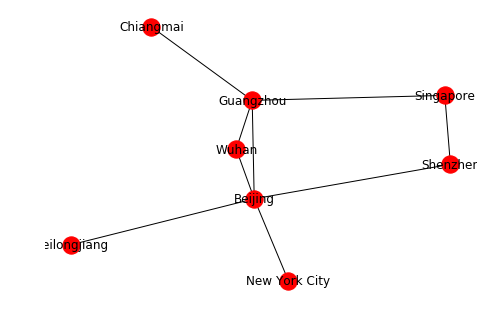

In [23]:
networkx.draw(air_route,with_labels=True)

In [24]:
def search_destination(graph,start,destination):
    pathes=[[start]]
    seen=set()
    choosen_path=[]
    while pathes:
        path=pathes.pop(0)
        froniter=path[-1]
        
        for city in graph[froniter]:
            new_path=path+[city]
            pathes.append(new_path)
            if city == destination: return new_path
    return None


In [31]:
def draw_route(citys): return '✈->'.join(citys)

In [32]:
search_destination(air_route,CM,SZ)

['Chiangmai', 'Guangzhou', 'Beijing', 'Shenzhen']

In [33]:
draw_route(search_destination(air_route,CM,SZ))

'Chiangmai✈->Guangzhou✈->Beijing✈->Shenzhen'